Semestrální práce - předmět MSP
==============
Autor: Richard Klem<br>
Login: xklemr00<br>
Číslo VUT: 213177<br>
Email: xklemr00@stud.fit.vutbr.cz<br>


# První příklad

Načtení potřebných knihoven pro všechny příklady.

In [1]:
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn
from pingouin import anova

Načtení dat - latence připojení X a Y:

In [2]:
    X_ms = [24.80, 24.84, 24.58, 21.73, 24.79, 21.00, 26.57, 18.31, 25.01,
            21.71, 22.53, 19.25, 23.67, 21.17, 25.10, 21.82, 26.71, 23.14,
            22.31, 21.32, 23.83, 19.18, 22.79, 20.25, 24.97, 22.57, 24.64,
            21.12, 26.04, 21.34, 22.79, 21.76, 25.49, 19.82, 25.37, 20.30,
            26.76, 20.27, 25.32, 22.67, 25.31, 20.93, 26.19, 19.81, 25.06,
            20.63, 23.95, 22.10, 24.91, 21.41]
    Y_ms = [28.08, 21.40, 25.90, 25.24, 23.18, 24.87, 27.56, 24.03, 25.96,
            25.37, 21.85, 22.15, 24.88, 21.75, 23.01, 23.99, 22.05, 25.92,
            24.45, 23.05, 24.07, 23.11, 24.14, 26.93, 20.31, 20.95, 23.71,
            25.07, 23.76, 24.92, 23.70, 22.14, 23.70, 25.61, 25.27, 24.38,
            22.57, 24.56, 23.69, 22.79, 22.95, 27.71, 26.20, 25.05, 26.20,
            24.41, 21.95, 22.56, 20.31, 23.43]

## Normalita dat

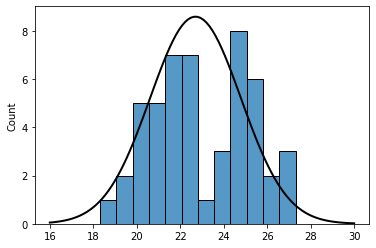

In [3]:
seaborn.histplot(X_ms, binwidth=0.75)

data = np.random.normal(23, 2.25, 100)
mu, std = ss.norm.fit(data) 
x = np.linspace(16, 30, 100)
p = ss.norm.pdf(x, mu, std)
plt.plot(x, p*45, 'k', linewidth=2)

plt.show()

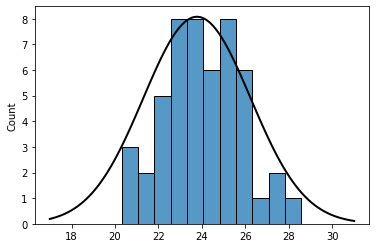

In [4]:
seaborn.histplot(Y_ms, binwidth=0.75)
data = np.random.normal(24, 2.4, 100)
mu, std = ss.norm.fit(data) 
x = np.linspace(17, 31, 100)
p = ss.norm.pdf(x, mu, std)
plt.plot(x, p*50, 'k', linewidth=2)

plt.show()

In [5]:
print(f"X: {ss.normaltest(X_ms)}")  # NOT normal
print(f'X: {ss.shapiro(X_ms)}')  # IS normal
print(f'X: {ss.anderson(X_ms)}', )  # NOT normal

X: NormaltestResult(statistic=7.950849275332316, pvalue=0.018771328788801035)
X: ShapiroResult(statistic=0.9578119516372681, pvalue=0.07198256999254227)
X: AndersonResult(statistic=0.7744160891702379, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [6]:
print(f"Y: {ss.normaltest(Y_ms)}")  # IS normal
print(f'Y: {ss.shapiro(Y_ms)}')  # IS normal
print(f'Y: {ss.anderson(Y_ms)}', )  # IS normal

Y: NormaltestResult(statistic=0.17133148684056448, pvalue=0.9179009943953961)
Y: ShapiroResult(statistic=0.9890083074569702, pvalue=0.9203163385391235)
Y: AndersonResult(statistic=0.11994944484758463, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


## Testy o rozdělení

Protože data nesplňují podmínku normality, použil jsem neparametrické testy.

In [7]:
print(ss.mannwhitneyu(X_ms, Y_ms))
Ux = ss.mannwhitneyu(X_ms, Y_ms).statistic
m = 50
n = 50
asymptotic_MW_test = (Ux - m * n / 2) / np.sqrt(m * n * (m + n + 1) / 12)
print(f"Testovací kritérium u = {asymptotic_MW_test}")

MannwhitneyuResult(statistic=922.0, pvalue=0.02395894356623561)
Testovací kritérium u = -2.261172919149933


In [8]:
print(ss.mannwhitneyu(X_ms, Y_ms, alternative="less"))  # X is less than Y
print(ss.mannwhitneyu(X_ms, Y_ms, alternative="greater"))  # X is greater than Y

MannwhitneyuResult(statistic=922.0, pvalue=0.011979471783117805)
MannwhitneyuResult(statistic=922.0, pvalue=0.9882338683326318)


In [9]:
print(ss.kruskal(X_ms, Y_ms))
print(f"co-W = {format(ss.chi2.ppf(0.95, 1), '.4f')}")

KruskalResult(statistic=5.113179109582846, pvalue=0.023744772017848945)
co-W = 3.8415


# Druhý příkald

Byl proveden průzkum, zda čas [min] potřebný k vyřešení určité úlohy závisí na denní době nebo na 
hlučnosti okolí.

Denní doba (faktor 1) nabývá tří hodnot: ráno, v poledne a večer. Hlučnost okolí 
(faktor 2) nabývá čtyři hodnoty:
 - tiché prostředí, reprodukovaná hudba, pouliční hluk, křik (dítěte, 
studentů, kteří ve vedlejším pokoji slaví úspěšné absolvování zkoušky z MSP).

Počet studentů, kteří řešili úkol za určitých podmínek, byl různý. Čas v minutách potřebný k vyřešení úlohy je uveden v tabulce.

Do tabulky si každý student ke každé hodnotě faktoru 1 připíše jím zvolené hodnoty.

(Zvolí si číslo a zvolí si, do které hodnoty faktoru 2 ho připíše. Tedy v tabulce přibudou celkem tři hodnoty.)

Zjistěte, zda doba potřebná k vyřešení úlohy závisí na denní době nebo na hlučnosti okolí nebo na kombinaci obou faktorů. 

Předpokládejte rovnost rozptylů v jednotlivých kategoriích.

Moje upravená tabulka vypadá následovně:

Zajímá nás porovnání dvou faktorů, přičemž je důležitá velikost hodnot a ne jenom počet. Toto vede na analýzu rozptylů ANOVA.

Poku bychom se zajímali pouze o počet v jednotlivých polích, vedlo by to na kategoriální analýzu.

Důležité poznatky:
 - protože není stejný počet záznamů pro každou kombinaci faktorů, musíme použít nevyváženou ANOVA metodu.
 - protože nás zajímá i kombinace faktorů, musíme použít metodu nevyvážená ANOVA s interakcí.

## Příprava dat

In [10]:
f1_names = ["rano", "poledne", "vecer"]
f2_names = ["ticho", "hudba", "hluk", "krik"]

data = [
    [[6,8,11,7], [7,8,12,10], [8,7,20], [13,21]],
    [[8,13,7,6],[5,11,7],[10,17,11,13], [14]],
    [[7,8,6],[6,8,16,15],[12,17,8],[13,17,15,22,18]]
]

records = []
combinations = list(product(enumerate(f1_names), enumerate(f2_names)))
combinations = [(a,b,c,d) for (a,b),(c,d) in combinations]
for i, f1, j, f2 in combinations:
    [records.append([f1, f2, n]) for n in data[i][j]]

column_names = ["f1", "f2", "time"]
df = pd.DataFrame(records, columns=column_names)

## Výpočet
Jsou vybrány pouze sloupce, které nás zajímá z hlediska zamítnutí nulové hypotézy.

Source - zdroj variability, DF - počet stupňů volnosti, F - testovací kritérium, co-W_right - pravá hranice doplňku kritického oboru a p-unc - p-hodnota bez korekce.

Když je p-hodnota bez korekce, tak má vždy přísnější rozhodovací sílu než s korekcí. Tedy udává větší statistickou významnost. Hodnoty s korekcí jsou méně přísné.

In [11]:
ret = anova(data=df, dv="time", between=["f1", "f2"], ss_type=2,
            detailed=True, effsize="n2")
ret["co-W_right"] = [3.3404, 2.9467, 2.4453, np.nan]
ret = ret[["Source", "DF", "F", "co-W_right", "p-unc"]]
print(ret)

     Source    DF         F  co-W_right     p-unc
0        f1   2.0  0.155623      3.3404  0.856617
1        f2   3.0  8.230613      2.9467  0.000440
2   f1 * f2   6.0  0.366846      2.4453  0.893696
3  Residual  28.0       NaN         NaN       NaN


Použitá literatura pro příklad 2:
 - https://en.wikipedia.org/wiki/Ordinary_least_squares
 - https://www.statsmodels.org/stable/anova.html
 - https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova

# Příklad 3
Prováděl jsem výzkym, zda studijní průměr závisí na množství zkonzumovaných masných výrobků.
Jelikož se na ZŠ v prvouce učíme, že díky konzumaci masa se pračlověku vyvinul mozek, ale zároveň se lze v poslední době čím dál více doslechnout, že lidé by měli přejít na rostlinou stravu.
Zajímalo mě tedy, jestli lze na nynějších vysokoškolácích pozorovat závislost studijních úspěchů a způsobu stravování.
Celkem jsem obdržel 141 odpovědí, ale jedna odpověď obsahovala nevyplněnou hodnotu o stravování.
Nenastavil jsem totiž ony dvě otázky jako povinné, šlo tedy odpovědět i prázdnými hodnotami.
Naštestí se jednalo o ojedinělý exemplář, který můžu tedy odstranmit bez negativního dopadu na zbylý soubor dat.
Níže je tabulka četností odpovědí bez výše zmíněné nevalidní odpovědi.

Pro zpracování dat jsem použil metodu \texttt{chi2_contingency} z knihovny \texttt{scipy.stats}.
Pro zajímavost jsem zkusil všechny dostupné metody výpočtu testovacího kritéria $\Chi^2$ a to konkrétně "log-likelihood", "mod-log-likelihood", "freeman-tukey", "neyman" a "cressie-read".
Všechny metody byly vypočitaly v podstatě stejné výsledky. Nějvětší rozdíl byl řádově v setinách.

Funkce pro výpočet a výpis výslekdů kategoriální analýzy:

In [12]:
def cat_analysis(data, columns=None):
    method = "pearson"
    alpha = 0.05

    chi2, p_value, dof, theo_freq = ss.chi2_contingency(data, lambda_=method)
    chi2_dist_dof = (len(data)-1)*(len(data[0])-1)
    chi2_co_W = format(ss.chi2.ppf(1-alpha, chi2_dist_dof), '.4f')
    print(
        f"\nX^2 = {format(chi2, '.4f')} | p-value = {format(p_value, '.4f')}"
        f" | dof = {dof}, X^2(dof={dof}) = {chi2_co_W}")
    theo_freq = pd.DataFrame(theo_freq, columns=columns)
    pd.set_option('display.float_format', lambda x: '%0.2f' % x)
    print(f"{theo_freq}")

In [13]:
data_orig = [[9, 22, 27, 14, 0], [6, 10, 18, 10, 0], [0, 0, 0, 2, 0],
             [2, 2, 3, 1, 0], [0, 2, 3, 1, 0], [1, 1, 3, 2, 1]]
data_red_1 = [[9, 22, 27, 14], [6, 10, 18, 12], [3, 5, 9, 5]]
data_red_2_lepsi = [[31, 27, 14], [16, 18, 12], [8, 9, 5], ]
data_red_2_horsi = [[9, 22, 41], [6, 10, 30], [3, 5, 14]]
data_red_3 = [[31, 41], [16, 30], [8, 14]]

cat_analysis(data_red_1, columns=["1.0-1.4", "1.5-1.9", "2.0-2.4", "2.5 a vice"])
cat_analysis(data_red_2_lepsi, columns=["1.0-1.9", "2.0-2.4", "2.5 a vice"])
cat_analysis(data_red_2_horsi, columns=["1.0-1.4", "1.5-1.9", "2.0 a vice"])
cat_analysis(data_red_3, columns=["1.0-1.9", "2.0 a vice"])


X^2 = 1.5992 | p-value = 0.9526 | dof = 6, X^2(dof=6) = 12.5916
   1.0-1.4  1.5-1.9  2.0-2.4  2.5 a vice
0     9.26    19.03    27.77       15.94
1     5.91    12.16    17.74       10.19
2     2.83     5.81     8.49        4.87

X^2 = 1.1654 | p-value = 0.8838 | dof = 4, X^2(dof=4) = 9.4877
   1.0-1.9  2.0-2.4  2.5 a vice
0    28.29    27.77       15.94
1    18.07    17.74       10.19
2     8.64     8.49        4.87

X^2 = 1.3327 | p-value = 0.8558 | dof = 4, X^2(dof=4) = 9.4877
   1.0-1.4  1.5-1.9  2.0 a vice
0     9.26    19.03       43.71
1     5.91    12.16       27.93
2     2.83     5.81       13.36

X^2 = 0.8988 | p-value = 0.6380 | dof = 2, X^2(dof=2) = 5.9915
   1.0-1.9  2.0 a vice
0    28.29       43.71
1    18.07       27.93
2     8.64       13.36
